# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

**Case study 1** will be analysed here.

## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [1]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

Requirement already up-to-date: bokeh in /usr/local/lib/python3.6/dist-packages (2.2.3)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

In [3]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

Output hidden; open in https://colab.research.google.com to view.

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [4]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [5]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [6]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [7]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [8]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [9]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [10]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [11]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [12]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653154

In [13]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.036510830626211646

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [14]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

## The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

In [15]:
nx.overall_reciprocity(G_advice)

0.3923766816143498

In [16]:
nx.overall_reciprocity(G_work)

1.0

The estimated reciprocity for the advice and work network is, as expected, different. This could likely be attributed to the fact that in the work network there is a bidirectional flow. Namely, co-workers working together on the same assigned case, or in which they mutually read or used their work product within the firm. On the other hand, the advice network is somewhat more one directional, where maybe advice is seek only to some selected few whose inputs carry more weight, so to say.

Seems like everyone works with 21 because he is in close proximity to 25.

In [17]:
for n1, n2, d in G_work.edges(data=True):
  d.pop('weight', None)

In [18]:
#nx.draw(G_work, with_labels=False)
#print(nx.info(G_work))

In [19]:
for n1, n2, d in G_advice.edges(data=True):
  d.pop('weight', None)

In [20]:
nx.get_edge_attributes(G_work, 'weight')

{}

In [21]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))



Output hidden; open in https://colab.research.google.com to view.

In [22]:
g_work_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'])

In [23]:
show(hv.render(g_work_plot))

In [24]:
g_advice_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'])

In [25]:
show(hv.render(g_advice_plot))

In [26]:
cent_degree_work = dict(nx.degree(G_work))

In [27]:
cent_degree_advice = dict(nx.degree(G_advice))

In [28]:
sorted(cent_degree_work.items(),key=lambda x:-x[1])[:10]

[(21, 56),
 (25, 54),
 (15, 50),
 (16, 44),
 (18, 40),
 (27, 40),
 (14, 38),
 (30, 38),
 (23, 36),
 (31, 36)]

In [29]:
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree_work')

g_work_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree_work')

show(hv.render(g_work_plot))

In [30]:
sorted(cent_degree_advice.items(),key=lambda x:-x[1])[:10]

[(25, 61),
 (12, 50),
 (27, 49),
 (23, 48),
 (15, 47),
 (16, 47),
 (40, 43),
 (18, 41),
 (11, 40),
 (29, 37)]

In [31]:
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree_advice')

g_advice_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree_advice')

show(hv.render(g_advice_plot))

In [32]:
# Import libraries
import community # `python-louvain` is implemented here

In [33]:
nx.is_directed(G_work)

True

In [34]:
nx.is_directed(G_advice)

True

In [35]:
# Find the optimal partition with the Louvain algorithm.
community_work = community.best_partition(G_work.to_undirected())

In [36]:
# The number of communities detected
max(community_work.values())

3

In [37]:
nx.set_node_attributes(G_work, community_work, 'community_work')

g_work_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree_work', 
                                                  node_color='community_work', 
                                                  legend_position='right')

show(hv.render(g_work_plot))

In [67]:
# Find the optimal partition with the Louvain algorithm.
community_advice = community.best_partition(G_advice.to_undirected())

In [68]:
# The number of communities detected
max(community_advice.values())

2

In [69]:
nx.set_node_attributes(G_advice, community_advice, 'community_advice')

g_advice_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree_advice', 
                                                  node_color='community_advice',
                                                  legend_position='right')

show(hv.render(g_advice_plot))

It seems like there are three main communities, revolving around 25, 27 and 16. Interestingly, 21 seems to be a nexus between 27 and 25.

---

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [41]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [42]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-11 19:00:34--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-11 19:00:34--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip.2’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.07s   

20

In [43]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [44]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-11 19:02:04--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-11 19:02:04--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip.3’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.07s   

20

In [45]:
# Load the data
stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [46]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

--2020-12-11 19:02:17--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip [following]
--2020-12-11 19:02:18--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip.1’

shapefiles.zip.1    100%[===================>]  31.21M  56.8MB/s    in 0.5s    

2020-12-11 19:02:21 (56.8 MB/s) - ‘sh

In [47]:
# Loads municipality data
municipalities = gdp.read_file("KOMMUNE.shp")

In [48]:
# Load the data
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")

In [49]:
#stoejdata.head()
#municipalities.head()
#mun_data.head()

#stoejdata.info()
#municipalities.info()
#mun_data.info()

In [50]:
municipalities['KOMKODE'] = municipalities['KOMKODE'].astype(float)
municipalities.head()

,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,KOMNAVN,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,geometry
0,149673,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,350.0,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((675926.480 6172129.210 -999.000, 6..."
1,149674,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,350.0,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((687523.890 6176458.950 -999.000, 6..."
2,149675,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,350.0,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689361.510 6173523.720 -999.000, 6..."
3,149676,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,350.0,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689210.210 6174589.210 -999.000, 6..."
4,149647,6310,Kommune,vedtaget,endelig,389130,25096.56,1084,Region Hovedstaden,2018-01-22,None,250.0,Frederikssund,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,"POLYGON Z ((679613.660 6187623.990 -999.000, 6..."


In [51]:
stoejdata_new = stoejdata.groupby(['KOMMUNE']).mean()
noise = stoejdata_new.GNSHAST071.reset_index()
noise

,KOMMUNE,GNSHAST071
0,0.0,72.907692
1,101.0,31.097826
2,147.0,30.845000
3,151.0,72.583333
4,153.0,92.830769
...,...,...
92,846.0,108.113333
93,849.0,67.772727
94,851.0,51.842678
95,860.0,67.390741


In [52]:
noise_in_mun = municipalities.merge(noise, left_on = 'KOMKODE', right_on = 'KOMMUNE' )

In [53]:
mun_noise = noise_in_mun.dissolve(by='KOMNAVN')

In [54]:
mun_noise.head()

,geometry,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,KOMMUNE,GNSHAST071
KOMNAVN,,,,,,,,,,,,,,,,,,,,,,,,,,
Aabenraa,MULTIPOLYGON Z (((532611.300 6079233.260 -999....,91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,580.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,580.0,80.434694
Aalborg,MULTIPOLYGON Z (((577131.740 6306752.540 -999....,149920,6310,Kommune,vedtaget,endelig,389206,113800.07,1081,Region Nordjylland,2018-11-07,None,851.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-11-07,2018-11-07,None,2020-11-07,851.0,51.842678
Aarhus,MULTIPOLYGON Z (((580132.510 6230146.780 -999....,150803,6310,Kommune,vedtaget,endelig,389194,47115.23,1082,Region Midtjylland,2018-06-28,None,751.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-06-28,2018-06-28,None,2020-11-07,751.0,87.732143
Albertslund,"POLYGON Z ((711377.280 6178342.550 -999.000, 7...",108994,6310,Kommune,vedtaget,endelig,389112,2343.66,1084,Region Hovedstaden,2020-08-27,None,165.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-08-27,2020-08-27,None,2020-11-07,165.0,49.565957
Allerød,"POLYGON Z ((701094.650 6192181.200 -999.000, 7...",151461,6310,Kommune,vedtaget,endelig,389121,6742.52,1084,Region Hovedstaden,2018-01-22,None,201.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,201.0,44.873134


In [55]:
mun_noise_psy = mun_noise.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")
mun_noise_psy.head()

,geometry,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,KOMMUNE,GNSHAST071,omr,alt2016,psyk2016,psykratio
0,MULTIPOLYGON Z (((532611.300 6079233.260 -999....,91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,580.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,580.0,80.434694,Aabenraa,7016,109,0.015536
1,MULTIPOLYGON Z (((577131.740 6306752.540 -999....,149920,6310,Kommune,vedtaget,endelig,389206,113800.07,1081,Region Nordjylland,2018-11-07,None,851.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-11-07,2018-11-07,None,2020-11-07,851.0,51.842678,Aalborg,18343,340,0.018536
2,MULTIPOLYGON Z (((580132.510 6230146.780 -999....,150803,6310,Kommune,vedtaget,endelig,389194,47115.23,1082,Region Midtjylland,2018-06-28,None,751.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-06-28,2018-06-28,None,2020-11-07,751.0,87.732143,Aarhus,28614,472,0.016495
3,"POLYGON Z ((711377.280 6178342.550 -999.000, 7...",108994,6310,Kommune,vedtaget,endelig,389112,2343.66,1084,Region Hovedstaden,2020-08-27,None,165.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-08-27,2020-08-27,None,2020-11-07,165.0,49.565957,Albertslund,3686,76,0.020619
4,"POLYGON Z ((701094.650 6192181.200 -999.000, 7...",151461,6310,Kommune,vedtaget,endelig,389121,6742.52,1084,Region Hovedstaden,2018-01-22,None,201.0,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,201.0,44.873134,Allerød,2902,27,0.009304


In [56]:
mun_noise_psy.crs

<Projected CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...>
Name: UTM32_EUREF89
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: EUREF89
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [57]:
mun_noise_psy = mun_noise_psy.to_crs(epsg=3857)

In [58]:
#ctx.providers.keys()

In [59]:
#ctx.providers.Esri.keys()

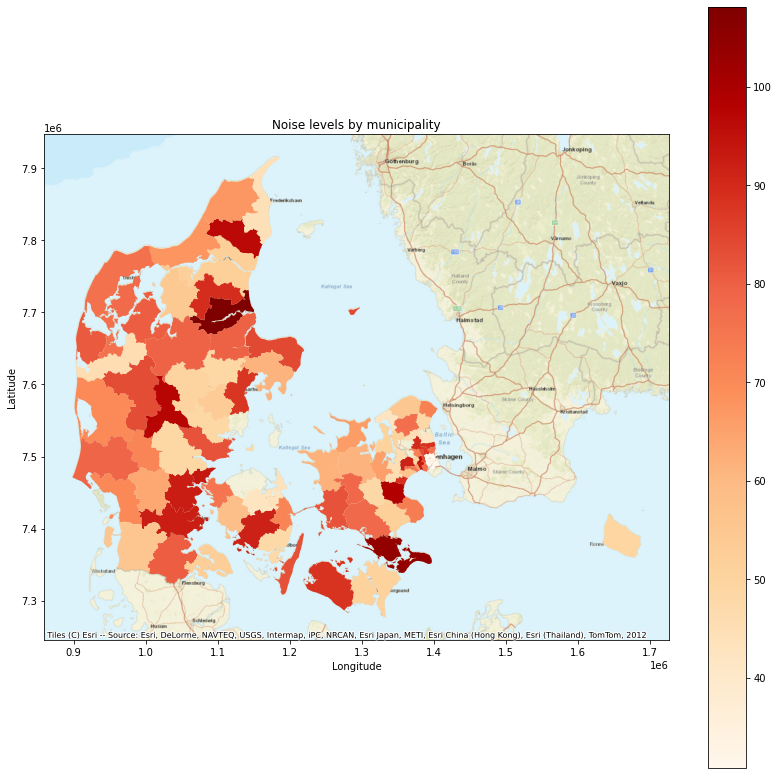

In [60]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
plt.title('Noise levels by municipality')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#mun_noise_psy.plot(column="psykratio", ax=ax, legend=True, color="red", label="Ratio of pshychiatric hospitalization", cmap='OrRd')
mun_noise_psy.plot(column="GNSHAST071", ax=ax, legend=True, label='Noise level', cmap='OrRd')
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)



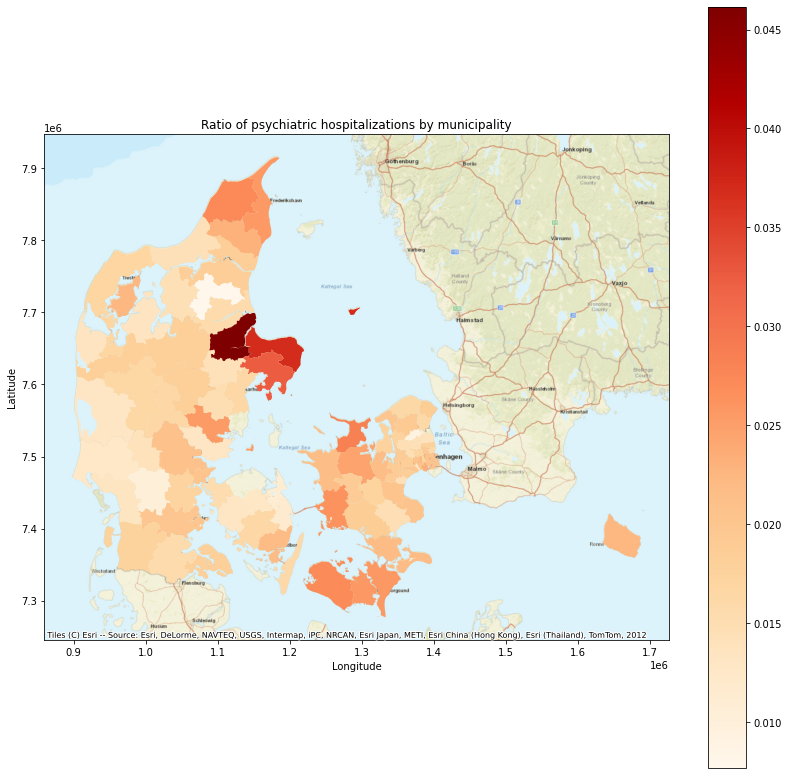

In [61]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
plt.title('Ratio of psychiatric hospitalizations by municipality')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
mun_noise_psy.plot(column="psykratio", ax=ax, legend=True, label="Ratio of pshychiatric hospitalization", cmap='OrRd')
#mun_noise_psy.plot(column="GNSHAST071", ax=ax, legend=True, label='Noise level')
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)
